In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import joblib

## Importing Data

In [2]:
df = pd.read_csv('train.csv')

## Looking at data and Data Clearing

In [3]:
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [4]:
df.duplicated().any()

False

In [5]:
df.isna().any()

id                False
url_legal          True
license            True
excerpt           False
target            False
standard_error    False
dtype: bool

We have nan for url_legal and license, but it doesn't matter for model

<Axes: >

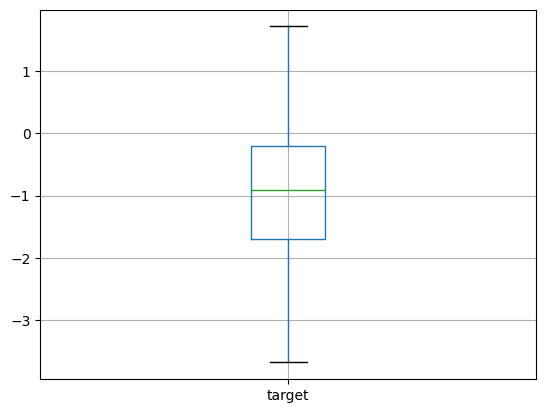

In [6]:
df.boxplot('target')

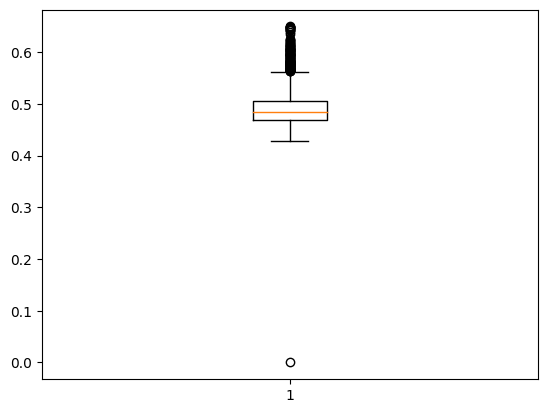

In [7]:
plt.boxplot(x = df.standard_error)
plt.show()

In [8]:
df.standard_error.describe()

count    2834.000000
mean        0.491435
std         0.034818
min         0.000000
25%         0.468543
50%         0.484721
75%         0.506268
max         0.649671
Name: standard_error, dtype: float64

In [9]:
df[df.standard_error == 0]

,id,url_legal,license,excerpt,target,standard_error
106,436ce79fe,NaN,NaN,"The sun was shining in a cloudless sky, and no...",0.0,0.0


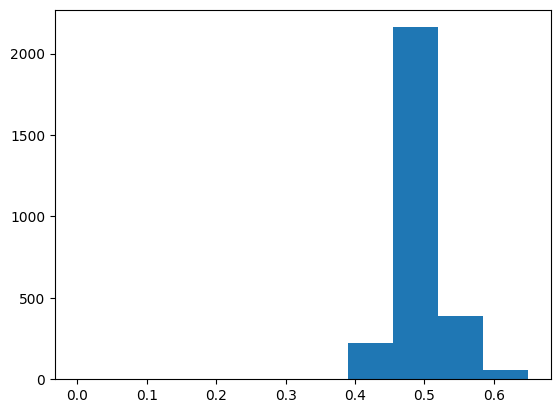

In [10]:
plt.hist(df.standard_error)
plt.show()

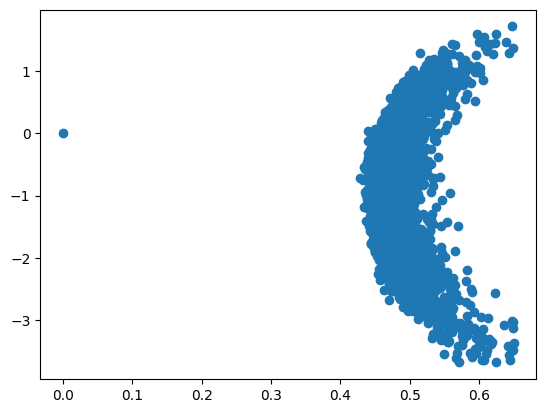

In [11]:
plt.scatter(df.standard_error, df.target)
plt.show()

Seems standard_error = target^2 relationship with high variance

In [12]:
len(df)

2834

## Splitting Data into train/test sets

In [13]:
df_train, df_test = train_test_split(df, test_size = 0.1, random_state = 42)

## Applying Tf-Idf vectorizer

In [14]:
vectorizer = TfidfVectorizer(min_df = 0.05, max_df = 0.95)
X_train = vectorizer.fit_transform(df_train.excerpt)
y_train = df_train.target

In [15]:
pd.DataFrame(X_train.toarray(), columns = vectorizer.get_feature_names_out())

,about,after,again,against,air,all,almost,along,also,always,...,without,work,world,would,year,years,yet,you,young,your
0,0.086746,0.000000,0.000000,0.0,0.140447,0.067255,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.057783,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.104824,0.076725,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.085428,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.080835,0.102118,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.065398,0.0,0.0,0.000000,0.000000,...,0.229206,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2546,0.000000,0.000000,0.000000,0.0,0.071539,0.000000,0.0,0.0,0.051424,0.131331,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.043705,0.0,0.0
2547,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.221418,...,0.000000,0.0,0.104777,0.000000,0.0,0.0,0.0,0.073686,0.0,0.0
2548,0.000000,0.174402,0.110160,0.0,0.000000,0.119383,0.0,0.0,0.000000,0.114418,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


## Training LinearRegression

In [16]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## Metrics

In [17]:
reg.score(X_train, y_train)

0.5127495299796315

In [18]:
mean_squared_error(y_train, reg.predict(X_train), squared = False)

0.7222506034562486

In [19]:
X_test = vectorizer.transform(df_test.excerpt)
y_test = df_test.target

In [20]:
reg.score(X_test, y_test)

0.41916537515026353

In [21]:
mean_squared_error(y_test, reg.predict(X_test), squared = False)

0.777456789135069

## Trying DeepLearning

In [22]:
import nltk
import gensim
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

In [23]:
y = df_train["target"].values
#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df_train["excerpt"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

In [24]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [25]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

#Tokenized applies basic processing like changing it yo lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [26]:
#Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
maxlen = 700 

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [27]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [28]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        try:
            weight_matrix[i] = model.wv[word]
        except:
            weight_matrix[i] = 0
    return weight_matrix

In [29]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

In [30]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding, LSTM
from tensorflow.keras.metrics import RootMeanSquaredError

In [52]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=64))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.1), loss='mean_squared_error', metrics=['mean_squared_error'])

In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 700, 100)          2547900   
                                                                 
 lstm_7 (LSTM)               (None, 64)                42240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,592,765
Trainable params: 44,865
Non-trainable params: 2,547,900
_________________________________________________________________


In [49]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [58]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size = 32)

Epoch 1/5
42/42 [==============================] - 18s 423ms/step - loss: 1.9572 - mean_squared_error: 1.9572 - val_loss: 2.1190 - val_mean_squared_error: 2.1190
Epoch 2/5
42/42 [==============================] - 18s 426ms/step - loss: 1.9572 - mean_squared_error: 1.9572 - val_loss: 2.1190 - val_mean_squared_error: 2.1190
Epoch 3/5
42/42 [==============================] - 18s 431ms/step - loss: 1.9572 - mean_squared_error: 1.9572 - val_loss: 2.1190 - val_mean_squared_error: 2.1190
Epoch 4/5
42/42 [==============================] - 18s 435ms/step - loss: 1.9572 - mean_squared_error: 1.9572 - val_loss: 2.1190 - val_mean_squared_error: 2.1190
Epoch 5/5
42/42 [==============================] - 18s 432ms/step - loss: 1.9572 - mean_squared_error: 1.9572 - val_loss: 2.1190 - val_mean_squared_error: 2.1190


In [59]:
print("RMSE of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("RMSE of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

60/60 [==============================] - 10s 162ms/step - loss: 2.0058 - mean_squared_error: 2.0058
RMSE of the model on Training Data is -  200.57740211486816 %
20/20 [==============================] - 3s 163ms/step - loss: 1.9922 - mean_squared_error: 1.9922
RMSE of the model on Testing Data is -  199.21562671661377 %


In [60]:
import matplotlib.pyplot as plt

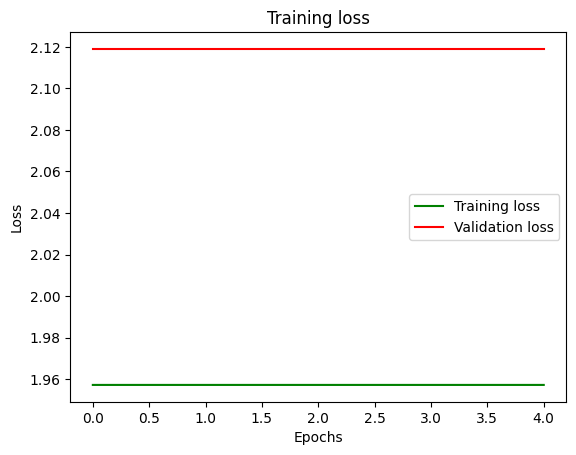

In [61]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'r', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model achieved its maximum. So, potential solutions: 1) more powerful or just another architecture; 2) another embeddings;

## Creating pipeline

In [63]:
pipe = Pipeline([('TfIdfVectorizer', vectorizer), ('lin_reg', reg)])

In [64]:
input_test = df_test.excerpt

In [65]:
pipe.predict(input_test)

array([ 0.0529962 , -1.67632644, -0.31409163, -0.6495209 , -0.02370529,
       -1.44005629, -1.72553555, -1.97412527, -2.69277126, -0.94825142,
       -1.42208591, -1.0194327 , -0.56441026, -1.33752542, -0.08703927,
       -1.77209206,  0.31472226, -1.69532406,  0.17719957, -1.20898888,
        0.33633507, -1.08560483, -1.35664047,  0.35306978, -1.46128772,
       -1.81036502, -0.3357261 ,  0.21295484, -0.51863351, -1.54494233,
       -2.40607771, -2.4963286 , -0.67186878, -1.83912473,  0.343785  ,
        0.10974265, -1.30235544, -0.54366559, -2.27244909, -0.53534308,
       -0.71044057,  0.38763371, -0.52141193, -1.22854531, -1.68438236,
       -1.47927559, -2.09120194, -1.73623348, -2.06446354, -1.7312224 ,
       -0.60417827,  0.53737891, -1.29142935, -1.34279968, -0.9662292 ,
       -0.44690106, -2.47224084, -0.72484627,  0.42699997, -2.01872247,
       -1.32160845, -0.36905153, -1.05714072, -1.28437193, -1.00889198,
        0.74371769,  0.36514993, -0.24148087, -0.96320386, -2.35

In [67]:
pipe.score(input_test, df_test.target)

0.41916537515026353

## Saving model

In [68]:
joblib.dump(pipe, 'pipeline.gz')

['pipeline.gz']